Kelompok 2Pendo :
1. Archie Citra Muhammad
2. Bernard Kian Yuniantoro 
3. Rahmawati Glamindia 
4. Mercy Eunike
5. Nur Amilah

# Churn Prediction Customer Bank

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

# Stage 1 Final Project - EDA, Insight, Visualization

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

## Load Dataset

In [3]:
df = pd.read_csv(r'D:\Document\File\Rakamin\Final Project\churn\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


## Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 976.6+ KB


Beberapa pengamatan:
1. Ada 14 kolom dan 10000 baris
2. float64(2 kolom), int64(9 kolom), object(3 kolom)
3. Semua tipe data sudah sesuai dengan nama kolomnya 
4. Tidak ada nilai kosong/missing data karena nilai non-Null Count == RangeIndex
5. Kolom `Exited` menjadi label/target

In [5]:
cats = ['Surname', 'Geography', 'Gender']
nums = ['RowNumber','CustomerId','CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0


In [7]:
df[nums].describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.01,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,3.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Beberapa pengamatan:
1. Kolom `CreditScore` tampak sudah cukup simetrik distribusinya (mean dan median tak berbeda jauh)
2. Kolom `RowNumber`,`CustomerId` bisa di-drop di langkah selanjutnya
3. Kolom `Age` tampaknya skew ke kanan (long-right tail), mungkin dapat dilakukan transformasi log nantinya
4. Kolom `HasCrCard`, `IsActiveMember`, dan `Exited` ternyata bernilai boolean/binary

In [8]:
df[cats].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Beberapa pengamatan:
1. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh Male (`Gender`) dan France (`Geography`)
2. Kolom `Surname` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (2932). Tampaknya kita perlu exclude fitur ini dari dataset untuk pemodelan.

Kesimpulan: 
1. Semua tipe data sudah sesuai dengan nama kolomnya
2. tidak ada nilai kosong karena nilai non-Null Count == RangeIndex
3. nilai mean dan median(50%) dari kolom `Balance` dan `EstimatedSalary` memiliki perbedaan yang cukup jauh
<br>distribusi kolom `Balance` negatively skewed dan kolom  `EstimateSalary` positevly skewed
<br>kolom `RowNumber`,`CustomerID`, `Surname` memiliki unique yang besar sehingga kemungkinan untuk drop kolom

## Value Counting and Unique Values

In [9]:
for col in nums:
    print(f'''Value Unique Kolom {col}: ''',df[col].nunique())
    print('---'*10, '\n')

Value Unique Kolom RowNumber:  10000
------------------------------ 

Value Unique Kolom CustomerId:  10000
------------------------------ 

Value Unique Kolom CreditScore:  460
------------------------------ 

Value Unique Kolom Age:  70
------------------------------ 

Value Unique Kolom Tenure:  11
------------------------------ 

Value Unique Kolom Balance:  6382
------------------------------ 

Value Unique Kolom NumOfProducts:  4
------------------------------ 

Value Unique Kolom HasCrCard:  2
------------------------------ 

Value Unique Kolom IsActiveMember:  2
------------------------------ 

Value Unique Kolom EstimatedSalary:  9999
------------------------------ 

Value Unique Kolom Exited:  2
------------------------------ 



In [10]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
for col in cats:
    print(f'''Value Count Kolom {col}: ''')
    print(df[col].value_counts())
    print('---'*10, '\n')

Value Count Kolom Surname: 
Smith         32
Scott         29
Martin        29
Walker        28
Brown         26
              ..
Fontaine       1
Rivero         1
Enticknap      1
Watterston     1
Grosse         1
Name: Surname, Length: 2932, dtype: int64
------------------------------ 

Value Count Kolom Geography: 
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------------------------------ 

Value Count Kolom Gender: 
Male      5457
Female    4543
Name: Gender, dtype: int64
------------------------------ 



kolom `Surname` memiliki value unique yang terlalu banyak (diatas 3) sehingga potensi untuk drop kolom pada stage selanjutnya

## Univariate Analysis

### Box plots

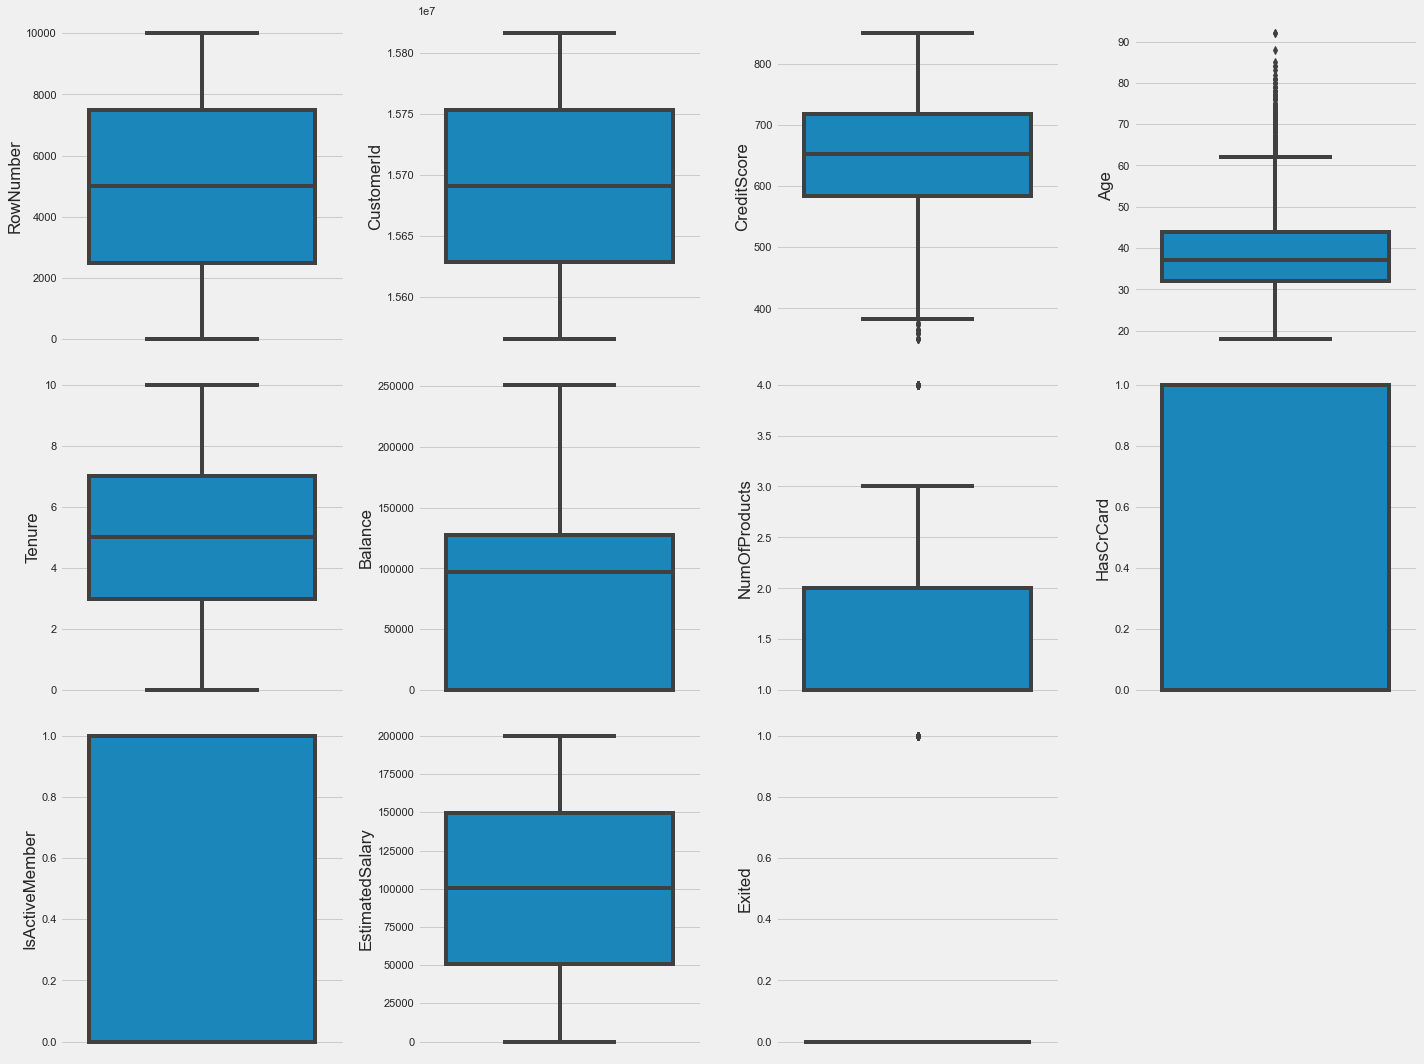

In [12]:
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Berdasarkan diagram boxplot diatas, feature `CreditScore`, `Age` dan `NumOfProduct` terdapat outlier

### Dist Plot

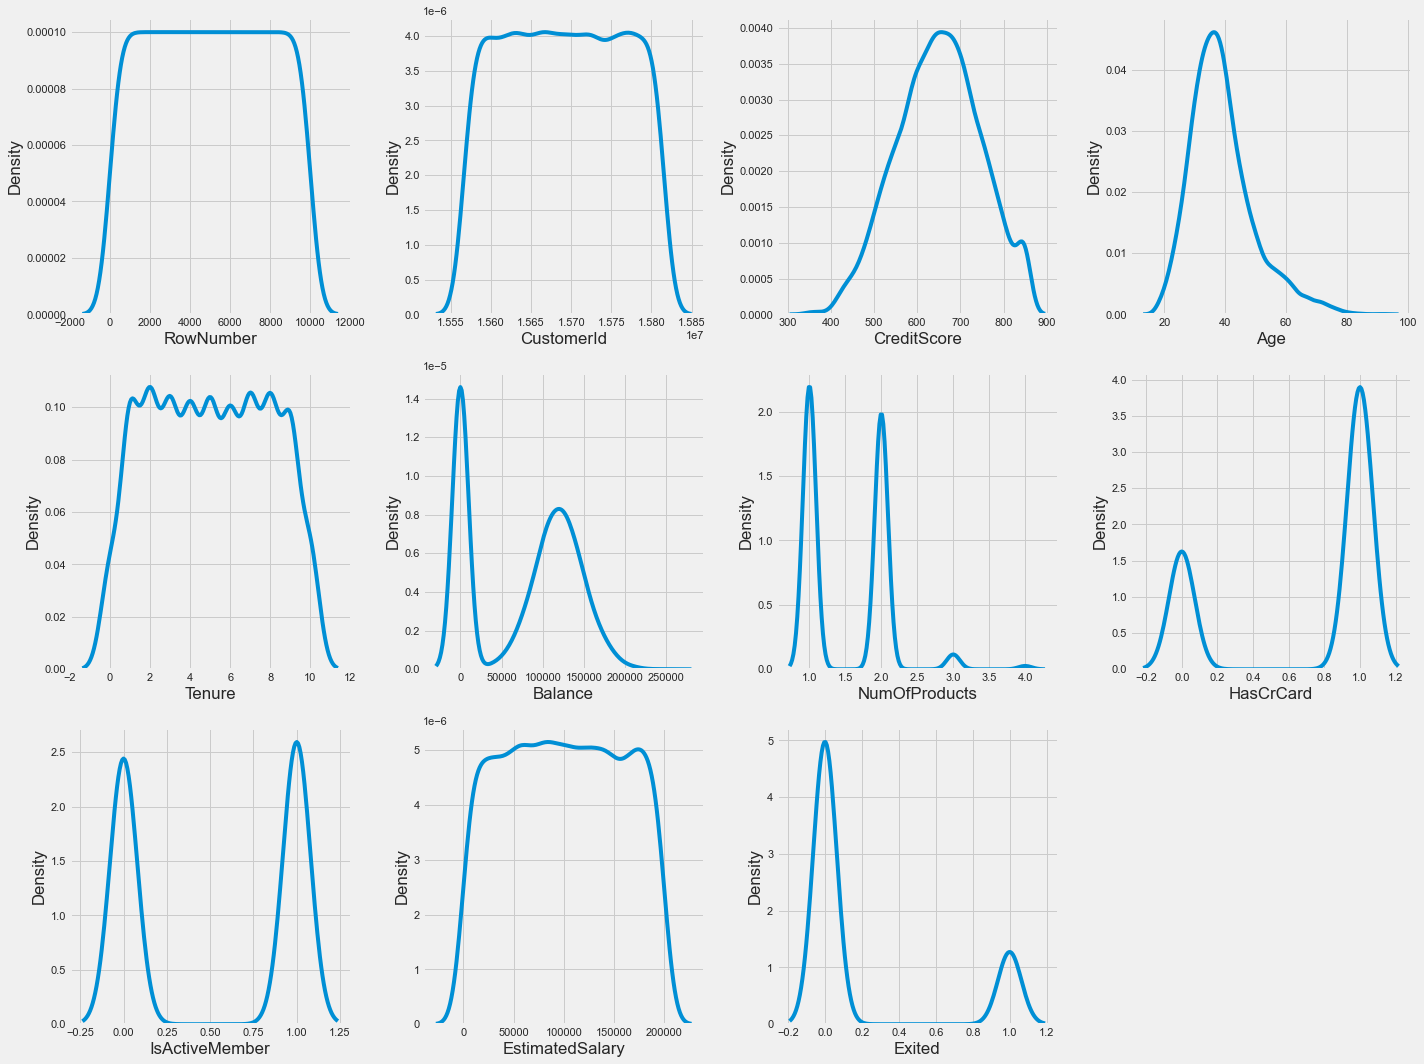

In [13]:
plt.figure(figsize=(20, 15))
for i in range(0, len(nums)):
    plt.subplot(3, 4,  i+1)
    sns.kdeplot(x = df[nums[i]])
    plt.xlabel(nums[i])
    plt.tight_layout()

Berdasarkan kde plot diatas menyatakan
1. feature `RowNumber`, `CustomerID` terbentuk unimodal
2. feature `Balance` terbentuk bimodal
3. feature `Age` positively Skewed
4. feature `CreditScore` mendekati distribusi normal
5. feature `Tenure`, `EstimatedSalary`, `NumOfProducts` terbentuk multimodal
6. feature `HasCrCard`, `IsActiveMember`, `Exited` berupa boolean
7. label tidak memiliki ketimpangan yang jauh antara Exited dan tidak

### Violin Plots

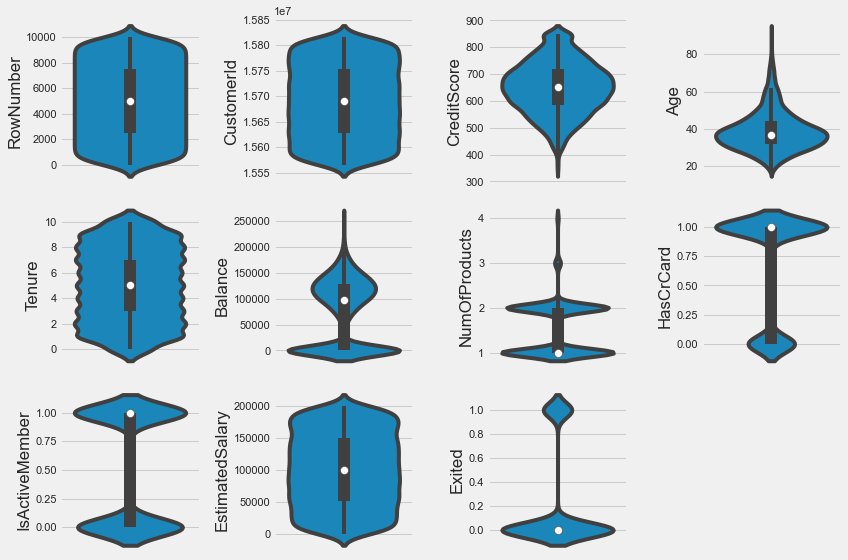

In [14]:
plt.figure(figsize=(12, 8))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.violinplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

### Count plot (categorical)

In [15]:
N = 10000
e = 0.05
slovin = N/(1+N * e**2)
slovin

384.6153846153846

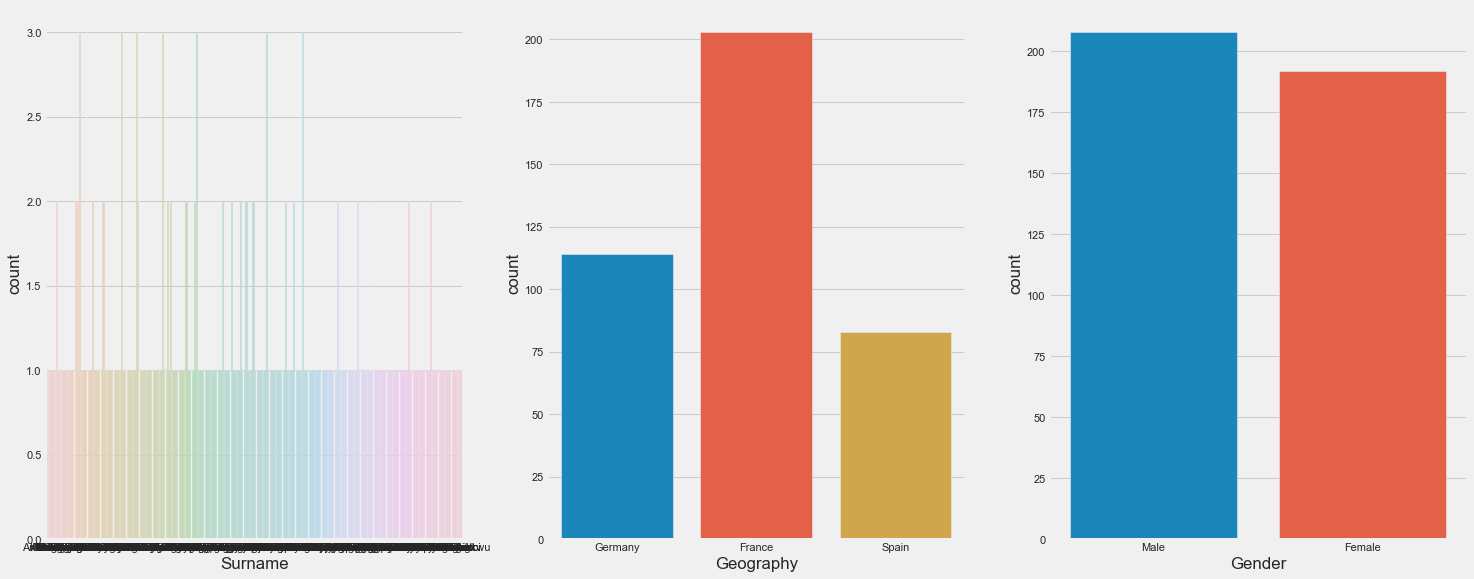

In [16]:
### Count plot (categorical)
# this one too heavy if we consider full dataset
# so we need to sample the data (400 rows)

df_sample = df.sample(400, random_state=42)
for i in range(0, len(cats)):
    plt.subplot(1, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], orient='v')
    plt.tight_layout()

Feature `Surname` memiliki terlalu banyak unique (diatas 3) akan drop feature di stage selanjutnya

## Bivariate Analysis

In [17]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.00,0.00,0.01,0.00,-0.01,-0.01,0.01,0.00,0.01,-0.01,-0.02
CustomerId,0.00,1.00,0.01,0.01,-0.01,-0.01,0.02,-0.01,0.00,0.02,-0.01
CreditScore,0.01,0.01,1.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Age,0.00,0.01,-0.00,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,-0.01,-0.01,0.00,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,-0.01,-0.01,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,0.02,0.01,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,0.00,-0.01,-0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.01,0.00,0.03,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.01,0.02,-0.00,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01


<AxesSubplot:>

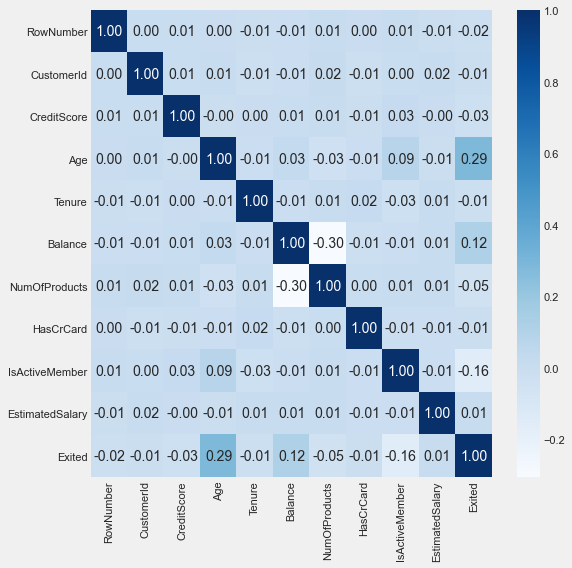

In [18]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Beberapa pengamatan :
1. Tidak ada korelasi redundan (>0.7)
2. Ada korelasi positif feature dan label/target : `Age` (0.29) , `Balance` (0.12)
3. Ada korelasi negatif feature dan label/target :`IsAcriveMember` (-0.16) dan `NumOfProducts` (-0.05)
4. Ada korelasi antara feature `IsActiveMember` terhadap feature `Age`dan feature `NumOfProducts` terhadap feature `Balance`
5. Feature `RowNumber`, `CustomerId`, `Tenure`, `EstimatedSalary`, `HasCrCard` tidak memiliki korelasi dengan label

<Figure size 1080x1080 with 0 Axes>

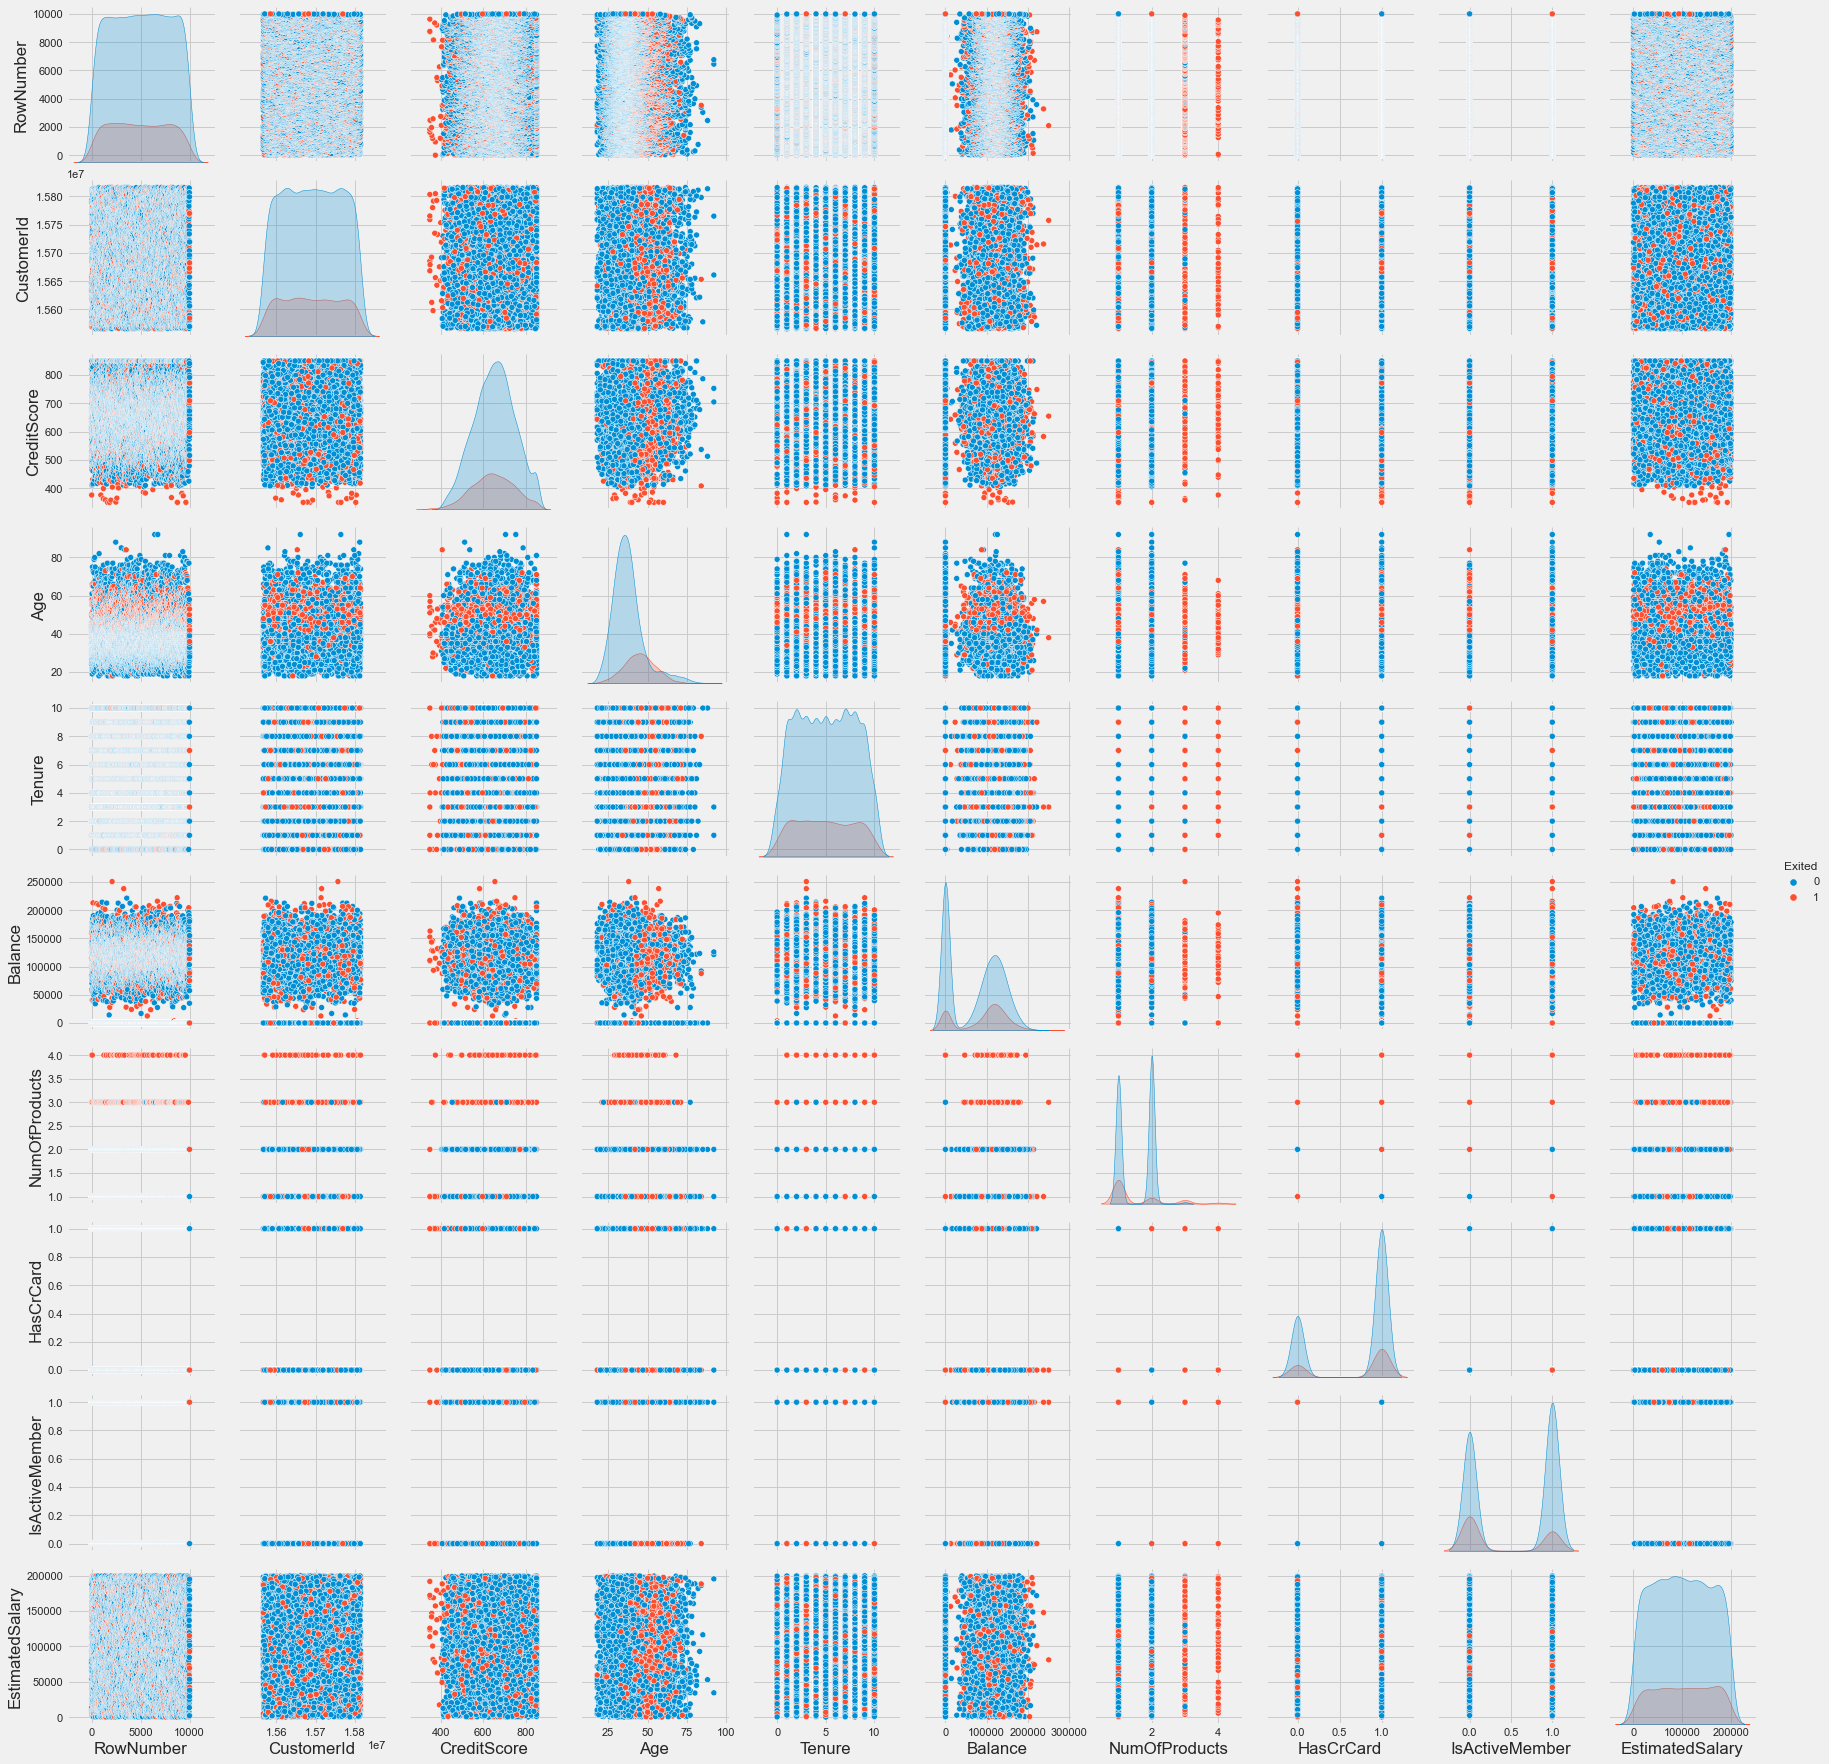

In [19]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Exited')

pada scatter plot diatas menunjukan tidak adanya kedua warna yang terpisah dengan baik

### Category columns VS Target Variable

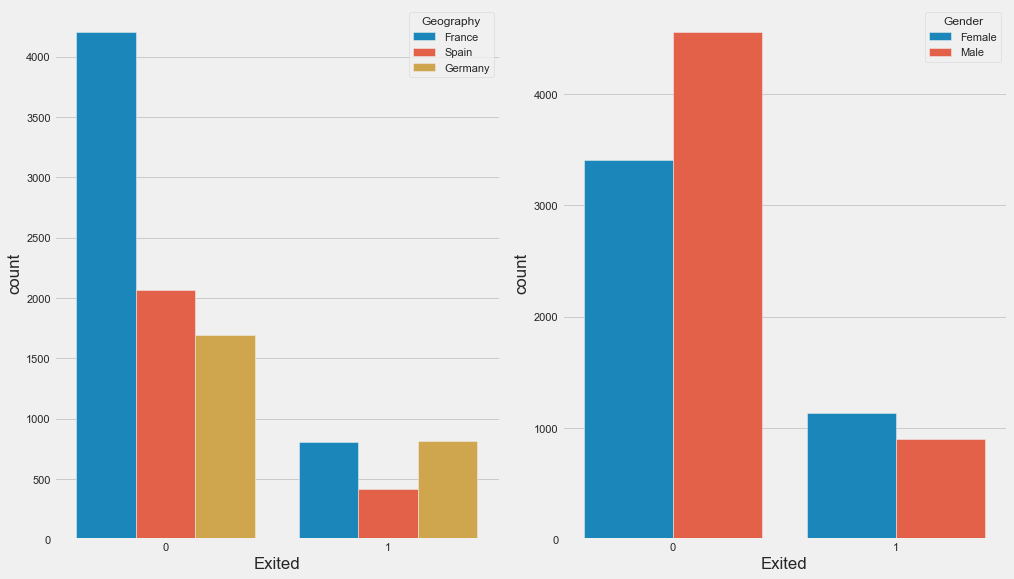

In [20]:
features = cats
for i in range(1, len(features)):
    plt.subplot(1, 3, i+1) 
    sns.countplot(data=df, x='Exited', hue=features[i])
    plt.tight_layout()


Kesimpulan :
1. korelasi feature dan label/target yang relevan dan dipertahankan adalah `Age` (0.29) , `Balance` (0.12), `IsAcriveMember` (-0.16) dan `NumOfProducts` (-0.05)
<br>feature `RowNumber`, `CustomerId`, `Tenure`, `EstimatedSalary`, `HasCrCard` tidak memiliki korelasi dengan label
<br>tidak terjadi ketimpangan feature kategori dengan label
2. feature `IsActiveMember` memiliki korelasi terhadap feature `Age` dan feature `NumOfProducts` terhadap feature `Balance`

## INSIGHT AND VISUALIZATION

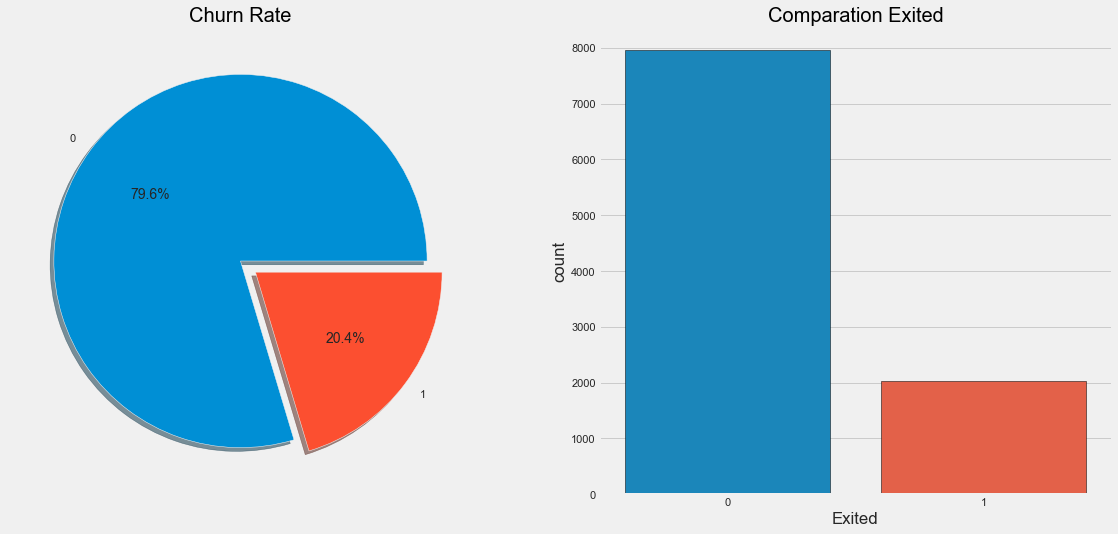

<Figure size 1490.4x595.44 with 0 Axes>

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn Rate', color='Black', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('Exited',data=df,ax=ax[1], edgecolor= 'black')
ax[1].set_title('Comparation Exited', color='Black', fontsize=20)
plt.show()

plt.tight_layout()
#f.savefig('pie_churn_rate.png', dpi=200)

Beberapa Pengamatan :
1. dari diagram pie diatas menyatakan nasabah yang churn memiliki persentase sebesar 20.4% dari total nasabah
2. dari bar chart diatas menyatakan tidak terjadi ketimpangan yang jauh antara jumlah `Exited` dan tidak dari total nasabah

### Gender

In [22]:
gender = df.groupby(['Exited', 'Gender'])['CustomerId'].nunique().reset_index()
gender_1 = df.groupby(['Gender'])['CustomerId'].nunique().reset_index(name='AllUnique')
gender= gender.merge(gender_1, on='Gender')
gender['Percentage']= round(gender['CustomerId']*100/gender['AllUnique'],2)
gender

,Exited,Gender,CustomerId,AllUnique,Percentage
0,0,Female,3404,4543,74.93
1,1,Female,1139,4543,25.07
2,0,Male,4559,5457,83.54
3,1,Male,898,5457,16.46


In [23]:
dfp = gender.pivot_table(index='Gender', columns='Exited', 
                       values='CustomerId')
dfp

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


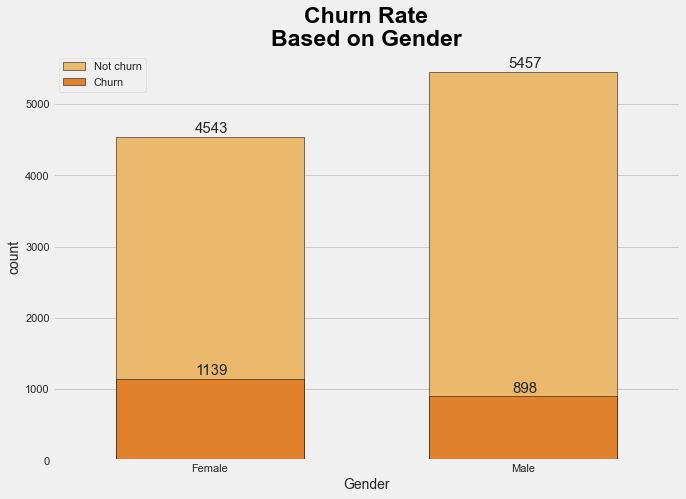

<Figure size 1490.4x595.44 with 0 Axes>

In [43]:
gender_total  = gender.groupby('Gender').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
gender_churn = gender[gender['Exited'] == 1]

plt.figure(figsize=(10,7))
g = sns.barplot(x= 'Gender', y= 'CustomerId', data=gender_total, 
                color='#ffbd59',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Not churn')

g = sns.barplot(x= 'Gender', y= 'CustomerId', data=gender[gender['Exited']==1], 
                color = '#ff7f0e',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Churn')

plt.title('Churn Rate\nBased on Gender', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .6)

plt.legend()

plt.xlabel('Gender', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()


plt.tight_layout()
#g.get_figure().savefig('gender.png', dpi=200)

Insight :
1. `Gender` yang memiliki nilai churn tertinggi adalah Female dengan persentase churn sebesar 25.07% dari total nasabah

### Geography

In [25]:
geo = df.groupby(['Exited', 'Geography'])['CustomerId'].nunique().reset_index()
geo_1 = df.groupby(['Geography'])['CustomerId'].nunique().reset_index(name='AllUnique')
geo= geo.merge(geo_1, on='Geography')
geo['Percentage']= round(geo['CustomerId']*100/geo['AllUnique'],2)
geo

,Exited,Geography,CustomerId,AllUnique,Percentage
0,0,France,4204,5014,83.85
1,1,France,810,5014,16.15
2,0,Germany,1695,2509,67.56
3,1,Germany,814,2509,32.44
4,0,Spain,2064,2477,83.33
5,1,Spain,413,2477,16.67


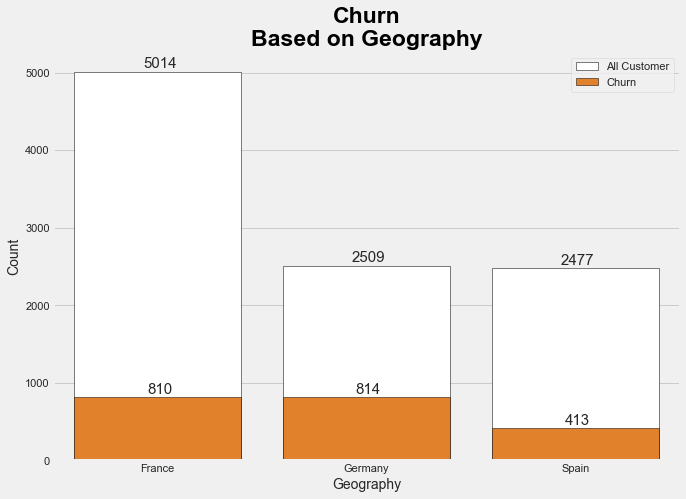

<Figure size 1490.4x595.44 with 0 Axes>

In [26]:
geo_total  = geo.groupby('Geography').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
geo_churn = geo[geo['Exited'] == 1]

plt.figure(figsize=(10,7))
g = sns.barplot(x= 'Geography', y= 'CustomerId', data=geo_total, 
                color='white',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'All Customer')

g = sns.barplot(x= 'Geography', y= 'CustomerId', data=geo[geo['Exited']==1], 
                color = '#ff7f0e',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Churn')

plt.title('Churn\nBased on Geography', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')

plt.legend()

plt.xlabel('Geography', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

plt.tight_layout()
#g.get_figure().savefig('geography.png', dpi=200)

Insight:
1. `Geography` yang memiliki nilai churn tertinggi adalah Germany dengan persentase churn sebesar 32.44% dari total nasabah
2. `Geography` Spain memiliki nasabah tersedikit namun nilai churn tertinggi kedua sebesar 16.67% dari total nasabah
3. `Geography` France memiliki nilai churn terendah dan nasabah terbesar sebesar 16.15% dari total nasabah

### Age

In [27]:
df["NewAge"] = pd.qcut(df['Age'], 3, labels=['Young Adults','Middle-aged Adults','Old Adults'])
newage = df.groupby(['Exited', 'NewAge'])['CustomerId'].nunique().reset_index()
newage_1 = df.groupby(['NewAge'])['CustomerId'].nunique().reset_index(name='AllUnique')
newage = newage.merge(newage_1, on='NewAge')
newage['Percentage']= round(newage['CustomerId']*100/newage['AllUnique'],2)
newage

,Exited,NewAge,CustomerId,AllUnique,Percentage
0,0,Young Adults,3389,3679,92.12
1,1,Young Adults,290,3679,7.88
2,0,Middle-aged Adults,2641,3106,85.03
3,1,Middle-aged Adults,465,3106,14.97
4,0,Old Adults,1933,3215,60.12
5,1,Old Adults,1282,3215,39.88


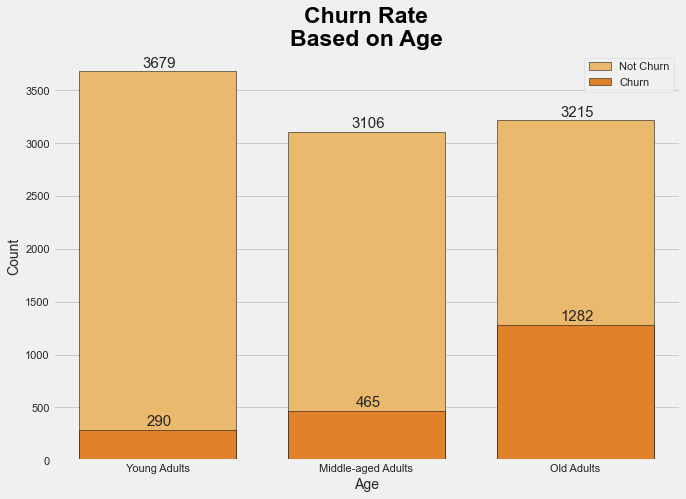

<Figure size 1490.4x595.44 with 0 Axes>

In [44]:
newage_total  = newage.groupby('NewAge').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
newage_churn = newage[newage['Exited'] == 1]

plt.figure(figsize=(10,7))
g = sns.barplot(x= 'NewAge', y= 'CustomerId', data=newage_total, 
                color='#ffbd59',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Not Churn')

g = sns.barplot(x= 'NewAge', y= 'CustomerId', data=newage[newage['Exited']==1], 
                color = '#ff7f0e',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Churn')

plt.title('Churn Rate\nBased on Age', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .75)
plt.legend()

plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

plt.tight_layout()
#g.get_figure().savefig('age.png', dpi=200)

Insight :
1. `Age` yang memiliki nilai churn terendah adalah Young Adults (17-34 th) dengan persentase churn sebesar 7.88% dari total nasabah
2. `Age` Old Aldults (41-90 th) memiliki nilai churn tertinggi sebesar 39.88% dari total nasabah
3. semakin bertambahnya umur maka semakin bertambah churn rate

### Balance

In [29]:
df["NewBalance"] = pd.qcut(df['Balance'], 4, labels=['Low','Medium','High'],duplicates='drop')
balance = df.groupby(['Exited', 'NewBalance'])['CustomerId'].nunique().reset_index()
balance_1 = df.groupby(['NewBalance'])['CustomerId'].nunique().reset_index(name='AllUnique')
balance = balance.merge(balance_1, on='NewBalance')
balance['Percentage']= round(balance['CustomerId']*100/balance['AllUnique'],2)
balance

,Exited,NewBalance,CustomerId,AllUnique,Percentage
0,0,Low,4212,5000,84.24
1,1,Low,788,5000,15.76
2,0,Medium,1843,2500,73.72
3,1,Medium,657,2500,26.28
4,0,High,1908,2500,76.32
5,1,High,592,2500,23.68


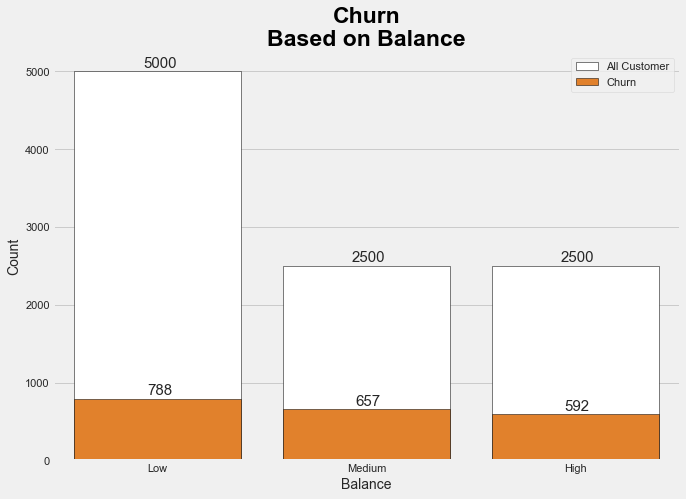

<Figure size 1490.4x595.44 with 0 Axes>

In [30]:
newbalance_total  = balance.groupby('NewBalance').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
newbalance_churn = balance[balance['Exited'] == 1]

plt.figure(figsize=(10,7))
g = sns.barplot(x= 'NewBalance', y= 'CustomerId', data=newbalance_total, 
                color='white',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'All Customer')

g = sns.barplot(x= 'NewBalance', y= 'CustomerId', data=balance[balance['Exited']==1], 
                color = '#ff7f0e',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Churn')

plt.title('Churn\nBased on Balance', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')
plt.legend()

plt.xlabel('Balance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

plt.tight_layout()
#g.get_figure().savefig('balance.png', dpi=200)

Insight :
1. `Balance` yang memiliki nilai churn terendah adalah low (0 - 97198.54) dengan persentase churn sebesar 15.76% dari total nasabah
2. `Balance` medium (97198.54, - 127644.24) memiliki nilai churn tertinggi sebesar 26.28% dari total nasabah

### IsActiveMember

In [31]:
member = df.groupby(['Exited', 'IsActiveMember'])['CustomerId'].nunique().reset_index()
member_1 = df.groupby(['IsActiveMember'])['CustomerId'].nunique().reset_index(name='AllUnique')
member = member.merge(member_1, on='IsActiveMember')
member['Percentage']= round(member['CustomerId']*100/member['AllUnique'],2)
member

,Exited,IsActiveMember,CustomerId,AllUnique,Percentage
0,0,0,3547,4849,73.15
1,1,0,1302,4849,26.85
2,0,1,4416,5151,85.73
3,1,1,735,5151,14.27


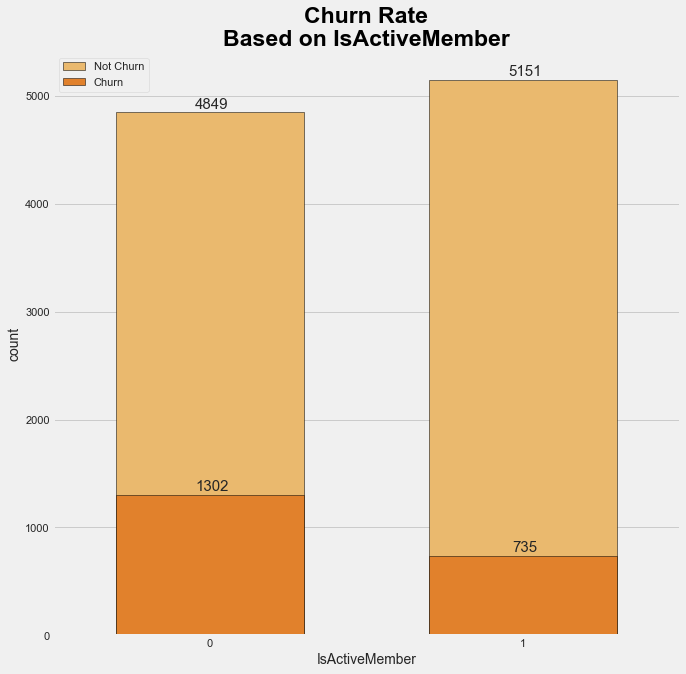

<Figure size 1490.4x595.44 with 0 Axes>

In [45]:
member_total  = member.groupby('IsActiveMember').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
member_churn = member[member['Exited'] == 1]

plt.figure(figsize=(10,10))
g = sns.barplot(x= 'IsActiveMember', y= 'CustomerId', data=member_total, 
                color='#ffbd59',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Not Churn')

g = sns.barplot(x= 'IsActiveMember', y= 'CustomerId', data=member[member['Exited']==1], 
                color = '#ff7f0e',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Churn')

plt.title('Churn Rate\nBased on IsActiveMember', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .6)
plt.legend()

plt.xlabel('IsActiveMember', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

plt.tight_layout()
#g.get_figure().savefig('IsActiveMember.png', dpi=200)

Insight :
1. `IsActiveMember` yang memiliki nilai churn terendah adalah active member (1) dengan persentase churn sebesar 14.27% dari total nasabah
2. `IsActiveMember` yang memiliki nilai churn tertinggi adalah non active member (0) dengan persentase churn sebesar 26.85% dari total nasabah
3. Semakin aktif member semakin rendah churn rate

### NumOfProducts

In [33]:
product = df.groupby(['Exited', 'NumOfProducts'])['CustomerId'].nunique().reset_index()
product_1 = df.groupby(['NumOfProducts'])['CustomerId'].nunique().reset_index(name='AllUnique')
product = product.merge(product_1, on='NumOfProducts')
product['Percentage']= round(product['CustomerId']*100/product['AllUnique'],2)
product

,Exited,NumOfProducts,CustomerId,AllUnique,Percentage
0,0,1,3675,5084,72.29
1,1,1,1409,5084,27.71
2,0,2,4242,4590,92.42
3,1,2,348,4590,7.58
4,0,3,46,266,17.29
5,1,3,220,266,82.71
6,1,4,60,60,100.00


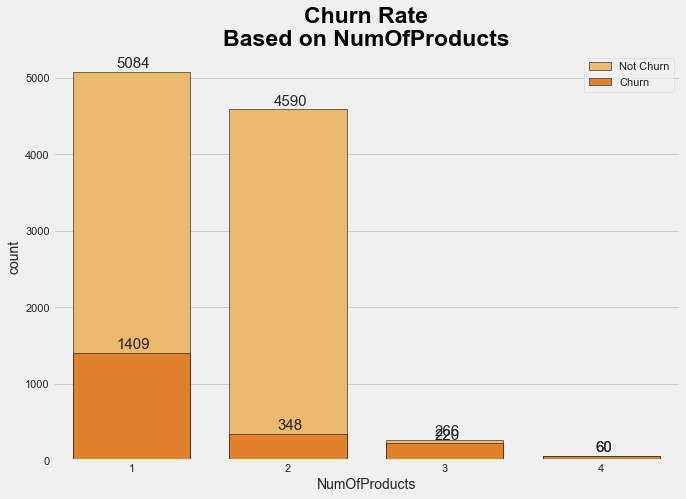

<Figure size 1490.4x595.44 with 0 Axes>

In [47]:
product_total  = product.groupby('NumOfProducts').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
product_churn = product[product['Exited'] == 1]

plt.figure(figsize=(10,7))
g = sns.barplot(x= 'NumOfProducts', y= 'CustomerId', data=product_total, 
                color='#ffbd59',
                edgecolor= 'black', 
                #linewidth = 2
                label = 'Not Churn')

g = sns.barplot(x= 'NumOfProducts', y= 'CustomerId', data=product[product['Exited']==1], 
                color = '#ff7f0e',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'Churn')

plt.title('Churn Rate\nBased on NumOfProducts', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(g, .75)
plt.legend()

plt.xlabel('NumOfProducts', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.show()

plt.tight_layout()
#g.get_figure().savefig('NumOfProducts.png', dpi=200)

Insight :
1. `NumOfProducts` 4 memiliki nilai churn tertinggi sebesar 100% dari total nasabah
2. `NumOfProducts` 2 memiliki nilai churn terendah sebesar 7.58% dari total nasabah
3. `NumOfProducts` 1 memiliki jumlah nasabah terbanyak

### NumOfProduct vs Balance

In [35]:
#df["NewBalance"] = pd.qcut(df['Balance'], 4, labels=['Low','Medium','High'],duplicates='drop')
product_balance = df.groupby(['NumOfProducts','NewBalance'])['CustomerId'].nunique().reset_index()
product_1_balance = df.groupby(['NumOfProducts'])['CustomerId'].nunique().reset_index(name='AllUnique')
product_balance = product_balance.merge(product_1_balance, on='NumOfProducts')
product_balance['Percentage']= round(product_balance['CustomerId']*100/product_balance['AllUnique'],2)
product_balance

,NumOfProducts,NewBalance,CustomerId,AllUnique,Percentage
0,1,Low,1786,5084,35.13
1,1,Medium,1655,5084,32.55
2,1,High,1643,5084,32.32
3,2,Low,3058,4590,66.62
4,2,Medium,761,4590,16.58
5,2,High,771,4590,16.80
6,3,Low,135,266,50.75
7,3,Medium,65,266,24.44
8,3,High,66,266,24.81
9,4,Low,21,60,35.00


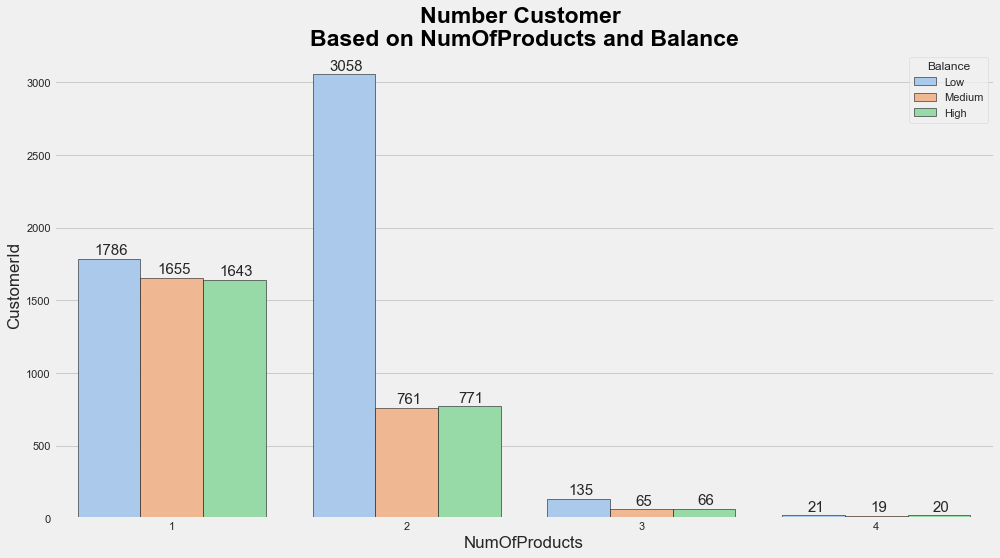

In [36]:
plt.figure(figsize=(15,8))

g = sns.barplot(x = 'NumOfProducts', y = 'CustomerId',
                hue = 'NewBalance',
                edgecolor= 'black',
                palette = 'pastel' ,
                #linewidth = 2,
                data = product_balance)

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')


plt.legend(title = 'Balance',loc = 'upper right')
plt.title('Number Customer \nBased on NumOfProducts and Balance', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

plt.show()

Insight :
1. Jumlah `CustomerID` terbanyak pada low `Balance` sebesar 66.62% dari total nasabah dalam`NumOfProducts` 2 
2. Kategori low `Balance` pada setiap `NumOfProducts`memiliki jumlah `CustomerID` terbanyak

### Age vs IsActiveMember

In [37]:
df['NewAge'] = pd.qcut(df['Age'], 3, labels=['Young Adults','Middle-aged Adults','Old Adults'])
memberage = df.groupby(['NewAge', 'IsActiveMember'])['CustomerId'].nunique().reset_index()
memberage_1 = df.groupby(['IsActiveMember'])['CustomerId'].nunique().reset_index(name='AllUnique')
memberage = memberage.merge(memberage_1, on='IsActiveMember')
memberage['Percentage']= round(memberage['CustomerId']*100/memberage['AllUnique'],2)
memberage

,NewAge,IsActiveMember,CustomerId,AllUnique,Percentage
0,Young Adults,0,1798,4849,37.08
1,Middle-aged Adults,0,1579,4849,32.56
2,Old Adults,0,1472,4849,30.36
3,Young Adults,1,1881,5151,36.52
4,Middle-aged Adults,1,1527,5151,29.64
5,Old Adults,1,1743,5151,33.84


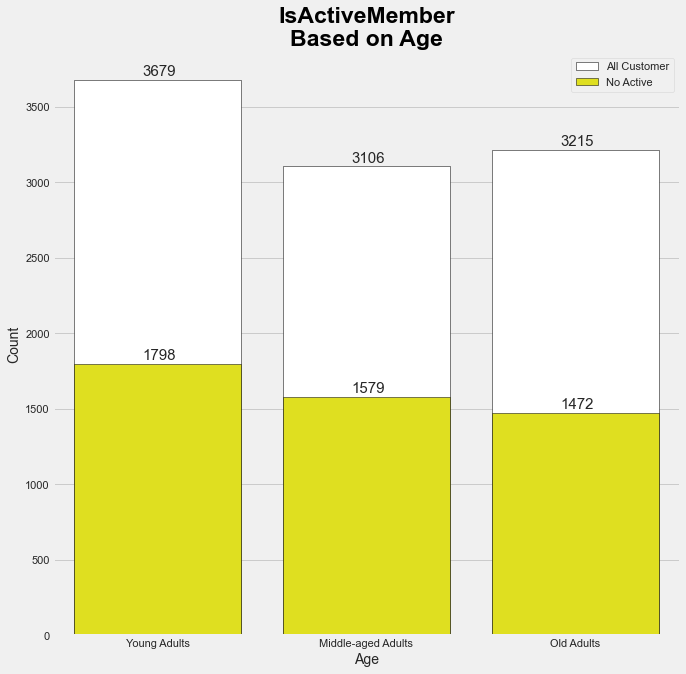

<Figure size 1490.4x595.44 with 0 Axes>

In [38]:
memberage_total  = memberage.groupby('NewAge').agg({'Percentage':'sum', 'CustomerId' :'sum'}).reset_index()
memberage_nonactive = memberage[memberage['IsActiveMember']==0]

plt.figure(figsize=(10,10))
g = sns.barplot(x= 'NewAge', y= 'CustomerId', data=memberage_total, 
                color='white',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'All Customer')

g = sns.barplot(x= 'NewAge', y= 'CustomerId', data=memberage[memberage['IsActiveMember']==0], 
                color = 'yellow',
                edgecolor= 'black', 
                #linewidth = 2,
                label = 'No Active')

plt.title('IsActiveMember\nBased on Age', 
          color='black', 
          loc='center',
          fontsize=23,
          fontweight='bold')

for bar in g.patches:
  g.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(2, 8),
                   textcoords='offset points')

plt.legend()

plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

plt.tight_layout()
#g.get_figure().savefig('member_age.png', dpi=200)

Insight :
1. Member non active terbanyak pada Young Adults sebesar 37.08% dari total nasabah
2. Member non active tersedikit pada Old Adults sebesar 30.36% dari total nasabah
3. Member non active memiliki jumlah nasabah terbanyak pada Young Adults

Kesimpulan :
1. `Gender` yang memiliki nilai churn tertinggi adalah Female
2. `Geography` yang memiliki nilai churn tertinggi adalah Germany
3. `Age` yang memiliki nilai churn tertinggi adalah Old Aldults (41-90 th)
4. `Balance` yang memiliki nilai churn tertinggi adalah Medium (97198.54, - 127644.24)
5. `IsActiveMember` yang memiliki nilai churn tertinggi adalah non Active Member
6. `NumOfProducts` yang memiliki nilai churn tertinggi adalah 2
7. Semakin banyak nasabah yang memakai produk/jasa (`NumOfProducts`>2) dari bank semakin besar churn ratenya
8. Semakin bertambahnya umur maka semakin bertambah churn rate